## Линейный регрессионный анализ с одной независимой переменной. Метод наименьших квадратов  
Задача одномерной линейной регрессии, по сути, та же, что и у коэффициента корреляции –  
оценить взаимосвязь между двумя количественными переменными. Различия между ними лежат в технической основе  
\+ в линейной регрессии более чётко выражено, какая переменная независимая (НП), а какая зависимая (ЗП).  
Иными словами, значения какой переменной влияют на другую переменную. НП традиционно лежит на оси Х, а ЗП – на оси Y.

Требования к данным:  
* Линейная взаимосвязь X и Y
* Нормальное распределение остатков
* Гомоскедантичность - постоянная изменчивость остатков на всех уровнях независимой переменной

Основное уравнение линейной регрессии: Y = b0 + b1 * X + ϵ  
b0 – свободный член регрессионного уравнения (Intercept), место, где регрессионная прямая пересекает ось Y.  
Интерпретация – какое значение принимает зависимая переменная, если независимая переменная равна нулю.  
b1 – угол наклона регрессионной прямой (slope), отражает направление взаимосвязи между НП и ЗП.  
ϵ – ошибка (остатки уравнения регрессии)

Классический метод нахождения оптимальных параметров уравнения линейной регрессии – метод наименьших квадратов (МНК).  
Он заключается в минимизации суммы квадратов ошибок от регрессионной прямой. Ошибка (остаток) в данном случае –  
это разница между индивидуальным значением в выборке (y) и соответствующим ему местом на регрессионной прямой ($\hat{y}$)  

Иными словами, этот метод направлен на то, чтобы прямая лежала максимально близко ко всем точкам.  
Остатки возводятся в квадрат для того, чтобы отрицательные остатки не вычитались из положительных  
(сумма “сырых” остатков в таком случае равна нулю).

b0: 98.42420919797723 b1: 0.9781748402682121
y = 98.42 + 0.98 * x


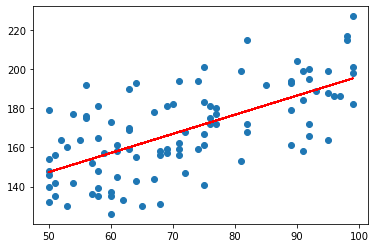

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

N = 100

X = np.array([np.random.randint(50, 100) for i in range(N)])
Y = np.array([i + np.random.randint(80, 120) - np.random.randint(-20, 20) for i in X])

plt.scatter(X, Y)

X_mean = np.mean(X)
Y_mean = np.mean(Y)
corr = np.sum((X - X_mean) * (Y - Y_mean)) / (np.sum((X - X_mean) ** 2) * np.sum((Y - Y_mean) ** 2)) ** 0.5

b1 = (np.std(Y) / np.std(X)) * corr
b0 = Y_mean - b1 * X_mean
print('b0:', b0, 'b1:', b1)
print(f'y = {b0:.2f} + {b1:.2f} * x')

plt.plot(X, b0 + b1 * X, color='red')
plt.show()

In [2]:
b1, b0 = np.polyfit(X, Y, 1)
print('Numpy b0:', b0, 'b1:', b1)

Numpy b0: 98.42420919797726 b1: 0.9781748402682117


In [3]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
model = sm.OLS(Y, X2) 
results = model.fit()
print('statsmodels: ', results.summary(), sep='\n')

statsmodels: 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     72.58
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           1.95e-13
Time:                        18:20:15   Log-Likelihood:                -426.27
No. Observations:                 100   AIC:                             856.5
Df Residuals:                      98   BIC:                             861.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.4242      8.410     1

### Анализ остатков

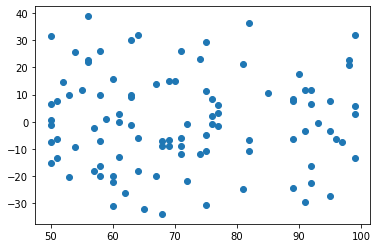

In [4]:
residuals = Y - (b0 + b1 * X)

plt.scatter(X, residuals)

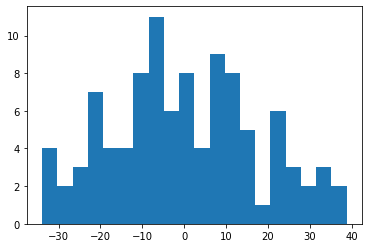

In [5]:
plt.hist(residuals, bins=20)
plt.show()

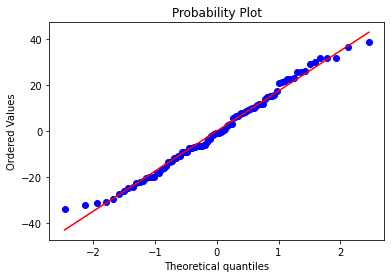

In [6]:
import pylab 

st.probplot(residuals, dist='norm', plot=pylab)
pylab.show()

In [7]:
from scipy.stats import shapiro

stat, p = shapiro(residuals)
print(f'Statistics={stat}, p={p}')
alpha = 0.05

if p > alpha:
    print('Residuals looks Normal (do not reject H0)')
else:
    print('Residuals does not look Normal (reject H0)')

Statistics=0.9849757552146912, p=0.3163169026374817
Residuals looks Normal (do not reject H0)


### Проверка гипотезы о значимости взаимосвязи

b0: 27.85822403613742 b1: -0.13892300986646586
y = 27.86 + -0.14 * x


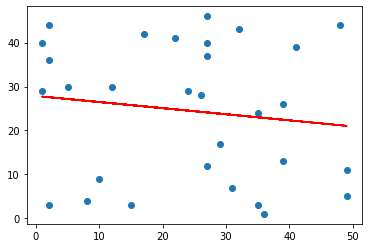

se:  0.19165513827525493
p_value: 0.4745527382841854
p_value(X < -0.72 or X > -0.72) > alpha. Do not reject H0


In [8]:
X = np.random.randint(0, 50, 30)
Y = np.random.randint(0, 50, 30)

plt.scatter(X, Y)

# H0: b1 = 0
# H1: b1 != 0
alpha = 0.05
df = len(Y) - 2

X_mean = np.mean(X)
Y_mean = np.mean(Y)
corr = np.sum((X - X_mean) * (Y - Y_mean)) / (np.sum((X - X_mean) ** 2) * np.sum((Y - Y_mean) ** 2)) ** 0.5

X_sd = np.std(X)
Y_sd = np.std(Y)
b1 = (Y_sd / X_sd) * corr
b0 = Y_mean - b1 * X_mean
print('b0:', b0, 'b1:', b1)
print(f'y = {b0:.2f} + {b1:.2f} * x')

plt.plot(X, b0 + b1 * X, color='red')
plt.show()

s2 = np.sum((Y - (b0 + b1 * X)) ** 2) / df

se = (s2 / (sum((X - X_mean) ** 2))) ** 0.5
print('se: ', se)

t = b1 / se
p_value = 2 * (1 - st.t.cdf(abs(t), df))
print('p_value:', p_value)

if p_value > alpha:
    print(f'p_value(X < {t:.2f} or X > {t:.2f}) > alpha. Do not reject H0')
else:
    print(f'p_value(X < {t:.2f} or X > {t:.2f}) < alpha. Reject H0')

In [9]:
print('scipy.stats linregress:', st.linregress(X,Y))

scipy.stats linregress: LinregressResult(slope=-0.13892300986646597, intercept=27.858224036137422, rvalue=-0.1357180732294727, pvalue=0.4745527382841851, stderr=0.19165513827525493, intercept_stderr=5.411104887608512)


In [10]:
X2 = sm.add_constant(X) # добавить константу, чтобы был свободный член
model = sm.OLS(Y, X2) # говорим модели, что у нас ЗП, а что НП
results = model.fit() # строим регрессионную прямую
print('statsmodels: ', results.summary())

statsmodels:                              OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.5254
Date:                Fri, 11 Jun 2021   Prob (F-statistic):              0.475
Time:                        18:20:16   Log-Likelihood:                -124.19
No. Observations:                  30   AIC:                             252.4
Df Residuals:                      28   BIC:                             255.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.8582      5.411      